In [ ]:
# 검정력 : H0가 참이 아닐 때, H0를 기각하는 확률 = 1 - β

In [3]:
# 대머리 치료제가 90%의 환자를 치료한다고 할 때,
# 15명의 대머리에게 약을 투여한 후, 11명이 치료가 되었다.
# 이 약은 90%의 환자를 치료한다고 할 수 있을까?

# H0 : p = 0.9
# H1 : p < 0.9

from scipy.stats import binom

# 파라미터
n = 15       # 시도 횟수
p = 0.9      # 성공 확률
x = 11       # 누적 확률을 구할 x값

# 누적 확률 계산: P(X <= 11)
prob = binom.cdf(x, n, p)

# 결과 출력
print(f"P(X <= 11) = {prob:.5f}")

P(X <= 11) = 0.05556


In [ ]:
# 0.05556은 0.5보다 크므로, 귀무가설을 채택

In [ ]:
from scipy.stats import binomtest

# 파라미터
n = 15        # 총 환자 수
x = 11        # 치료된 환자 수
p = 0.9       # 주장되는 치료 확률

# 이항 검정 (단측검정: p < 0.9)
result = binomtest(x, n=n, p=p, alternative='less')

# 결과 출력
print(f"p-value: {result.pvalue:.5f}")
if result.pvalue < 0.05:
    print("귀무가설을 기각합니다: 치료율이 90%보다 낮을 수 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다: 치료율이 90%라고 볼 수 있습니다.")

In [5]:
# N이 100이고 치료된 환자의 수가 80이라면?
# E(X) = np가 5보다 크므로, 정규분포로 근사
# X ~ B(n, p) -> N(np, npq) = N(100 * 0.9, 100 * 0.9 * (1 - 0.9)) = N(90, 9)
from scipy.stats import norm

mu = 100 * 0.9
std = (100 * 0.9 * 0.1) ** 0.5

# 연속성 보정: X <= 80 => X <= 80.5
z = (80.5 - mu) / std

# 누적 확률 계산
prob = norm.cdf(z)
 
print(f"P(X <= 80) ≈ P(Z <= {z:.2f}) = {prob:.5f}") # 귀무가설 기각

P(X <= 80) ≈ P(Z <= -3.17) = 0.00077


In [8]:
# 2종 오류 확률은?
# H0 : p = 0.9
# H1 : p = 0.8

# P(Z < -1.64) = 0.05
# 기각역 바깥 = Z >= 1.64 
# -> (X - 90) / 3 >= -1.64 
# -> X >= 85.08
from scipy.stats import norm
import math

n = 100
p = 0.8

np = n * p
npq = n * p * (1 - p)

np, npq

(80.0, 15.999999999999996)

In [12]:
# X ~ N(80, 16)으로 근사
# P(X >= 85.08)를 계산하면 2종 오류를 확인할 수 있다.

mu = np
std = math.sqrt(npq)

z = (85.08 - mu) / std

# P(Z >= 1.27) = 1 - P(Z < 1.27)
1 - norm.cdf(z) # 2종 오류 확률, 80% 사람이 치료되었을 때, 90%의 사람이 치료되었다는 귀무 가설을 사실로 받아들이는 확률

0.1020423150748192

In [ ]:
# 성별과 과자 A, B, C에 대한 선호도가 주어졌을 대, 카이제곱 검정을 수행하시오

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

# 관측도수 테이블
data = np.array([
    # A, B, C
    [15, 25, 20],  # 남자
    [10, 20, 10]   # 여자
])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(data)

# 결과 출력
print(f"Chi-squared 통계량: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("기대도수표:")
print(expected) 
# 남자가 과자 A를 좋아할 확률은 0.6 * 0.25 = 0.15

# 해석
alpha = 0.05
if p < alpha:
    print("귀무가설 기각: 성별과 과자 선호는 독립이 아니다.")
else:
    print("귀무가설 채택: 성별과 과자 선호는 독립이다.")

Chi-squared 통계량: 0.926
p-value: 0.6294
자유도: 2
기대도수표:
[[15. 27. 18.]
 [10. 18. 12.]]
귀무가설 채택: 성별과 영화 장르 선호는 독립이다.


In [ ]:
# ANOVA(분산분석)에서 "그룹 간 차이"가 얼마나 큰지를 측정하는 값

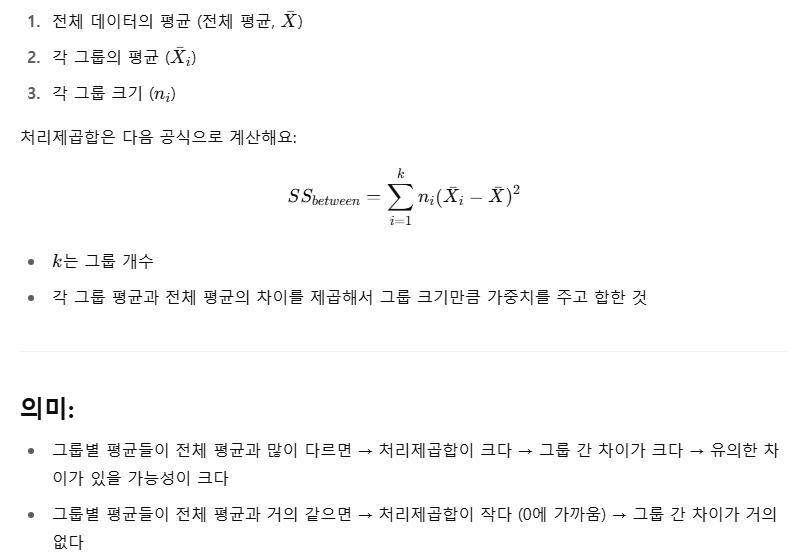

In [4]:
# 일원분산분석 검정에서 표본의 평균이 같은 경우 처리제곱합은?
import numpy as np

# 그룹별 데이터 (평균이 모두 같음)
group1 = np.array([4, 5, 6])
group2 = np.array([5, 5, 5])
group3 = np.array([2, 5, 8])

# 각 그룹 평균
mean1 = np.mean(group1)
mean2 = np.mean(group2)
mean3 = np.mean(group3)

# 전체 데이터 합치기
all_data = np.concatenate([group1, group2, group3])
overall_mean = np.mean(all_data)

# 그룹별 표본 수
n1 = len(group1)
n2 = len(group2)
n3 = len(group3)

# 처리 제곱합 계산 (SS_between)
SS_between = n1 * (mean1 - overall_mean)**2 + n2 * (mean2 - overall_mean)**2 + n3 * (mean3 - overall_mean)**2

print(f"그룹1 평균: {mean1}, 그룹2 평균: {mean2}, 그룹3 평균: {mean3}")
print(f"전체 평균: {overall_mean}")
print(f"처리 제곱합 (SS_between): {SS_between}")

그룹1 평균: 5.0, 그룹2 평균: 5.0, 그룹3 평균: 5.0
전체 평균: 5.0
처리 제곱합 (SS_between): 0.0
